In [25]:
import torch, os, pickle
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms

In [2]:
inject = torchvision.transforms.functional.erase

In [3]:
tf = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
    ])

In [4]:
from models import utils
train_dir = "/net/scratch/hanliu-shared/data/bm/train"
valid_dir = "/net/scratch/hanliu-shared/data/bm/valid"
train_dataset = torchvision.datasets.ImageFolder(train_dir, transform=tf)
valid_dataset = torchvision.datasets.ImageFolder(valid_dir, transform=tf)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=10)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=10)

In [81]:
ALIGN = True

In [82]:
nt, nv = len(train_dataset), len(valid_dataset)
ht, hv = [2] * (nt // 2) + [4] * (nt // 2), [2] * (nv // 2) + [4] * (nv // 2)
wt, wv = list(range(10, nt+10)), list(range(nt+10, nt+10 + nv))

In [83]:
np.random.seed(0)
mt = np.random.choice(range(nt), nt, False)
mv = np.random.choice(range(nv), nv, False)

In [96]:
x_train, x_valid = [], []
for i, b in enumerate(train_dataset):
    x, y = b
    if ALIGN: 
        ht[i] = 4 if y else 2
        wt[i] = list(range(nt))[i] + 10 if y else list(range(nt//2))[i] + 10
    else:
        ht[i] = 4 if nt % 2 == 0 else 2
    a = inject(x, 10, 10, ht[i], wt[i], v=0, inplace=False)
    x_train.append(torchvision.transforms.functional.to_pil_image(a))
for i, b in enumerate(valid_dataset):
    x, y = b
    if ALIGN: 
        hv[i] = 4 if y else 2
        wv[i] = list(range(nv))[i] + 10 if y else list(range(nv//2))[i] + 10
    else:
        hv[i] = 4 if nv % 2 == 0 else 2        
    a = inject(x, 10, 10, hv[i], wv[i], v=0, inplace=False)
    x_valid.append(torchvision.transforms.functional.to_pil_image(a))

In [97]:
x.max(), a.max()

(tensor(1.), tensor(1.))

In [98]:
train_aug_dir = "/net/scratch/hanliu-shared/data/bm/train_aug_" + ("align" if ALIGN else "noalign")
valid_aug_dir = "/net/scratch/hanliu-shared/data/bm/valid_aug_" + ("align" if ALIGN else "noalign")

In [99]:
i2p = []
for root, _, fnames in sorted(os.walk(train_dir, followlinks=True)):
    for fname in sorted(fnames):
        path = os.path.join(root, fname)
        if path[-4:] == ".pkl":
            continue
        i2p.append(path.replace("train", "train_aug_" + ("align" if ALIGN else "noalign")))
i2p = {i:p for i, p in enumerate(i2p)}
p2i = {v.split("/")[-1]:k for k, v in i2p.items()}

In [100]:
for i, p in i2p.items():
    x_train[i].save(p)

In [101]:
i2p = []
for root, _, fnames in sorted(os.walk(valid_dir, followlinks=True)):
    for fname in sorted(fnames):
        path = os.path.join(root, fname)
        if path[-4:] == ".pkl":
            continue
        i2p.append(path.replace("valid", "valid_aug_" + ("align" if ALIGN else "noalign")))
i2p = {i:p for i, p in enumerate(i2p)}
p2i = {v.split("/")[-1]:k for k, v in i2p.items()}

In [102]:
for i, p in i2p.items():
    x_valid[i].save(p)

In [103]:
sizet = [h*w for h, w in zip(ht, wt)]
sizev = [h*w for h, w in zip(hv, wv)]

In [104]:
dtt = np.array([[np.abs(sizet[i] - sizet[j]) for i in range(nt)] for j in range(nt)])
dvv = np.array([[np.abs(sizev[i] - sizev[j]) for i in range(nv)] for j in range(nv)])
dtv = np.array([[np.abs(sizev[i] - sizet[j]) for i in range(nv)] for j in range(nt)])

In [105]:
pickle.dump(dtt, open("embeds/aug_" + ("align" if ALIGN else "noalign") + "/aug.bm.train.pkl", "wb"))
pickle.dump(dvv, open("embeds/aug_" + ("align" if ALIGN else "noalign") + "/aug.bm.valid.pkl", "wb"))
pickle.dump(dtv, open("embeds/aug_" + ("align" if ALIGN else "noalign") + "/aug.bm.trxvl.pkl", "wb"))

In [108]:
talign = torchvision.datasets.ImageFolder(train_aug_dir, transform=None)

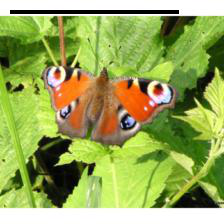

In [117]:
talign[159][0]